# Nhận dữ liệu giá cổ phiếu bằng Python
Là những người thực hành học máy, chúng ta cần thu thập dữ liệu về giá cổ phiếu để phân tích hồi quy và phân tích chuỗi thời gian. Chúng ta có thể dễ dàng tải xuống từ Yahoo Finance. Nhưng hãy tưởng tượng nếu chúng ta muốn tạo một ứng dụng có thể phân tích giá cổ phiếu theo thời gian thực, chúng ta cần thu thập tập dữ liệu mới nhất thay vì sử dụng tập dữ liệu đã tải xuống. Vì vậy, nếu bạn muốn tìm hiểu cách lấy dữ liệu giá cổ phiếu trong khoảng thời gian bất kỳ bằng cách sử dụng ngôn ngữ lập trình Python thì bài viết này là dành cho bạn. Trong bài viết này, tôi sẽ hướng dẫn bạn cách lấy dữ liệu giá cổ phiếu bằng Python.


Yahoo Finance là một trong những trang web phổ biến nhất để thu thập dữ liệu giá cổ phiếu. Bạn cần truy cập trang web, nhập tên công ty hoặc ký hiệu chứng khoán và bạn có thể dễ dàng tải xuống tập dữ liệu. Nhưng nếu muốn nhận tập dữ liệu mới nhất mỗi khi chạy mã, bạn cần sử dụng API yfinance. yfinance là API do Yahoo Finance cung cấp để thu thập dữ liệu giá cổ phiếu mới nhất. https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly90aGVjbGV2ZXJwcm9ncmFtbWVyLmNvbS8&guce_referrer_sig=AQAAAM6OLYlrrRheza_UXG7neNpnsEzxCo3daTdlYUQgWu2TNDdv3e-DFF9MImkkPBk_fy0ICg0HVtWefJ0CQcP6iEP5Pjnf9jH8VYZan6_Bzmy047TufpAUbOhPKoC4amQcKd9oA2ZE0z30CkBNew-mZnrxh-RKt8Z53_IE6-mm9Tob

In [7]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()#lấy ngày hiện tại
d1 = today.strftime("%Y-%m-%d") #chuyển đổi ngày hiện tại thành chuỗi theo định dạng "YYYY-MM-DD" và lưu vào biến d1.
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
#tính ngày 360 ngày trước ngày hiện tại, chuyển đổi thành chuỗi theo định dạng "YYYY-MM-DD" và lưu vào biến d2.
start_date = d2
data = yf.download('AAPL',
                      start=start_date,
                      end=end_date,
                      progress=False)
"""
sử dụng thư viện yfinance để tải dữ liệu chứng khoán của mã cổ phiếu "AAPL" (Apple Inc.) từ start_date đến end_date
và lưu vào DataFrame có tên là data. Thông số progress=False được sử dụng để tắt hiển thị tiến trình tải.
"""
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-29,159.369995,161.050003,159.350006,160.770004,159.916428,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024475,68749800
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287766,56976200
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750610,46278300


Đoạn mã trên sẽ thu thập dữ liệu giá cổ phiếu từ hôm nay đến 360 ngày qua. Trong tập dữ liệu này, Date không phải là một cột mà là chỉ mục của tập dữ liệu này. Để sử dụng dữ liệu này cho bất kỳ nhiệm vụ khoa học dữ liệu nào, chúng tôi cần chuyển đổi chỉ mục này thành một cột. Dưới đây là cách bạn có thể làm điều đó:

In [8]:
data["Date"] = data.index
data = data[["Date", "Open", "High",
             "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-29,159.369995,161.050003,159.350006,160.770004,159.916428,51305700
1,2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700
2,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024475,68749800
3,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287766,56976200
4,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750610,46278300


Như bạn có thể thấy, tập dữ liệu cuối cùng giống như tập dữ liệu mà chúng tôi tải xuống từ Yahoo Finance. Đây là cách chúng ta có thể lấy dữ liệu giá cổ phiếu bằng Python.

Sử dụng matplotlib.pyplot để vẽ đồ thị đường của giá đóng cửa (Close) của cổ phiếu AAPL theo thời gian. Bạn có thể tùy chỉnh mã này để hiển thị các yếu tố khác nhau của dữ liệu cổ phiếu, như giá mở cửa (Open), giá cao nhất (High), giá thấp nhất (Low), và thậm chí là khối lượng giao dịch (Volume).

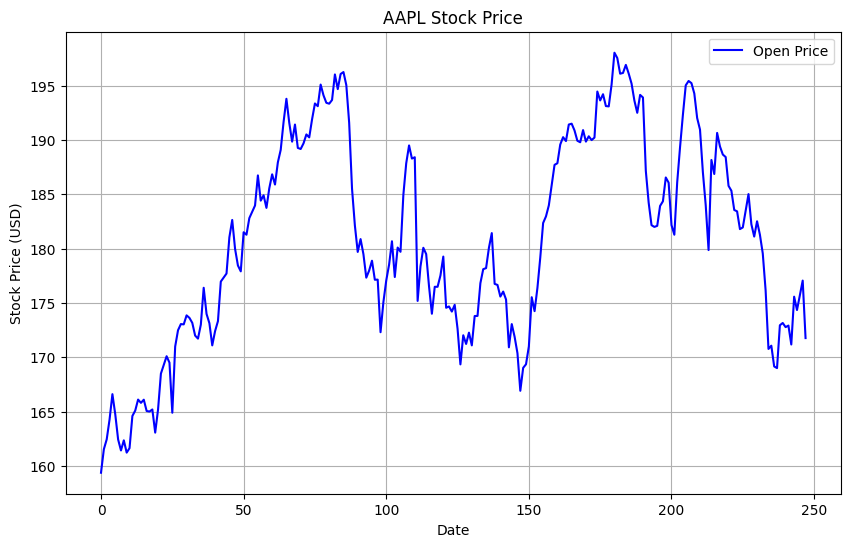

In [9]:
import matplotlib.pyplot as plt

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Open"], label='Open Price', color='blue')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

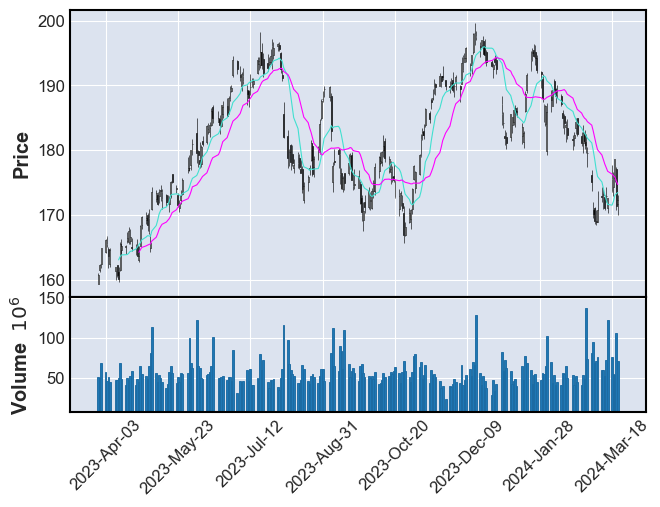

In [14]:
import pandas as pd
import mplfinance as mpf
# Chuyển cột 'Date' thành đối tượng DatetimeIndex
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
# Tạo một cột mới 'Date' để giữ nguyên giá trị của 'Date'
data['Date'] = data.index
# Vẽ đồ thị dạng nến
mpf.plot(data, type='candle', mav=(10, 20), volume=True, show_nontrading=True)
plt.show()